### Project Deliverable 2 - Healthstroke Dataset  

Link: The link to the dataset is: https://gist.github.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04

### Questions to Answer:

(1)	A summary of findings from the data exploration (Keep this a bulleted list, if possible!). 
Include (these are suggestions, you can do more!) remove outliers, change range of data, change type of data, deal with missing data, removing features, find mean, variance, std on variables, etc.

(2)	At least two charts from exploratory data analysis. 
Include, for example:  histograms (summarize features), scatter plots to view relationships between features, boxplots

(3)	An iPython notebook that includes all code and findings (even if it was not the final results, or you did not use it for the two charts!) and (1) and (2) above.)


### Q-Summary of changes and findings (combined and updated with part 3):

*Removed the ID column as it serves no purpose and made the data messy.

*Cleaned the data by removing all NaN values and double checking to make sure none exist.

*Found out the correlation between Male and Females - Which one of them was more prone to heart disease(Males were view code below).

*Found out the correlation between which group based on Age factors that are more prone to getting a stroke.

*Was able to find out how many people work in which work_type and turn that into a percentage to analyze my data.

*Found the correlation between which gender and age actually experiences more hypertension.

*FOR PART 3 of the project:

*Added two more addtional graph as requested to help better understand my data.

*Added a heatmap as a bonus to help better understand my data.

*Cleaned up the data, converted the string values to numerical so that my train_test_split can work properly.

*Filled in missing values.

*Performed RCF with Confusion Matrix.

*Performed precission report with an F1 accuracy score for 0 (negative) which returned a 0.97.

*0.95% percent total accuracy score.

*Provided summary and answered RCF question at the end.

In [38]:
#First going to import all my libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load in my dataset
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### I need to begin to better understand my dataset and know the exact values and attributes I am dealing with.

In [3]:
#Let me print out the first fives rows below as always
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Going to test the shape now just to make sure rows and columns match
df.shape

(5110, 12)

#### So according to the df.shape above, I can see that after viewing everything it matches the same amount of rows (5110) by the columns (12).

In [5]:
#Going to use describe first then shape to get everything situated and have a better look into my data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### After viewing the .describe function above I am able  to see my count,mean,stf,min, and max avg of all columns within my dataset. Now it is a starting to become easier to read.

In [6]:
#Next thing I want to do is view the information contained inside my data
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [7]:
#Just to be safe let me check .isnull() and sum of all columns to double check
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### After taking a look at everything the only column that contains any NaN values is my bmi column, so just simply remove those to make the data cleaner

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
#Simply going to use pandas.DataFrame.notna function and just delete all those NaN values from my BMI column
df = df[df['bmi'].notna()]
#Going to check now to make sure that everything is a 0 - meaning we have no NaN values left
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#Okay so since no columns have any NaN values as I mentioned in Project 1 I wanted to drop the ID column
#ID column is not needed here, and just makes the data more messier so I want to clean that up
df.drop(columns=['id'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Great now it has been cleaned up, I have dropped the 'id' column as well as removed all NaN values from the data

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
#Checking corelation between the age, avg_glucose_level and bmi of the patients to see the count, mean, std, min, percentages and max.
df.describe()[['age','avg_glucose_level','bmi']]

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### I have a column in my dataset labeled as heart_disease which directly is assigned to each person regardless of gender, I want to find out which gender is more prone to heart disease will it be male or female?

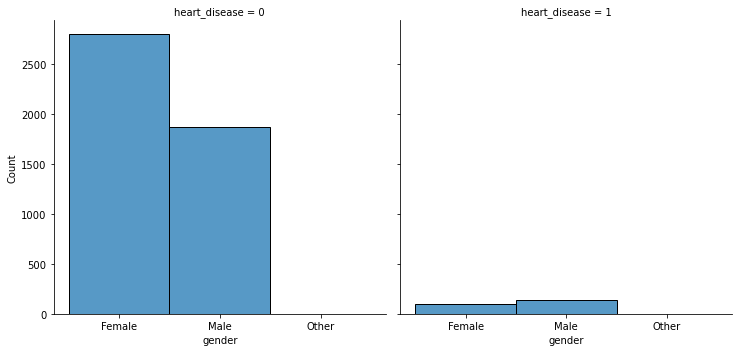

In [11]:
gender_heart_disease = sns.FacetGrid(df, col="heart_disease", height=5.0, col_wrap=4)
gender_heart_disease.map(sns.histplot, "gender")

Created with the help of tutorial on FaceTGrid from seaborn which I was able to replicate to use in my data: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

### Great so I found my answer which is that the actual correlation between being a male and getting heart disease is clearly higher than it is for females

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### By doing a similar graph, I want to know which age group is more prone to getting a stroke?

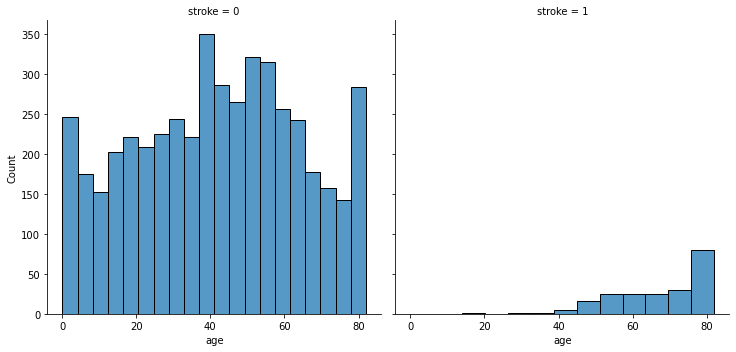

In [12]:
gender_heart_disease = sns.FacetGrid(df, col="stroke", height=5.0, col_wrap=4)
gender_heart_disease.map(sns.histplot, "age")

#### From analyzing my data I am able to make a conclusion that your likeliness of getting a stroke starts to increase at the age of 40, however significant increase change begins at the 55-60 year mark and finally it is at it's highest peak point at 80 years of age

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### I want to find out how many people work in which type of jobs, so I will analyze the work_type and turn it into a percentage based representation on my pie char

([<matplotlib.patches.Wedge at 0x15d5f5cea90>,
 [Text(-0.24879108922736856, 1.071495680775737, 'Private'),
  Text(-0.637819388573941, -0.8962066879683303, 'Self-employed'),
  Text(0.33227718432992226, -1.0486142630985806, 'children'),
  Text(0.9992482661232499, -0.45989444729163553, 'Govt_job'),
  Text(1.0998909760027331, -0.015486797853505655, 'Never_worked')],
 [Text(-0.13570423048765556, 0.5844521895140382, '57.262'),
  Text(-0.34790148467669507, -0.4888400116190892, '15.787'),
  Text(0.18124210054359394, -0.5719714162355893, '13.669'),
  Text(0.5450445087944998, -0.25085151670452843, '12.834'),
  Text(0.5999405323651271, -0.008447344283730356, '0.448')])

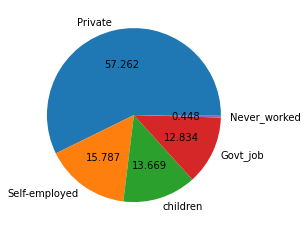

In [13]:
work_status=plt.pie(df["work_type"].value_counts(),labels=['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],autopct='%.3f')
work_status

#### After analyzing the data above I am able to confirm that most people work in the Private sector, followed by the Self-employed sector which is the second biggest

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Using a catplot below to be able to compare the corellation between hypertension and age, using hue to set as gender so that I can see both genders and compare both:

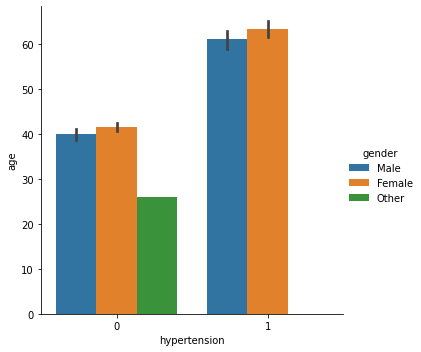

In [14]:
age_and_hyper_by_gender = sns.catplot(y= "age", x= "hypertension", hue="gender", kind="bar", data=df)
age_and_hyper_by_gender

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Beggining Part 3 Now:

### I want to be able to create an additional chart now that will be able to properly compare No Strokes and Stroke, so my Postive and Negative Stroke Cases, I will use these to create a ratio

Total Number with Positive Stroke IS: 
 209
Total Number with Negative Stroke IS: 
 4700


<BarContainer object of 2 artists>

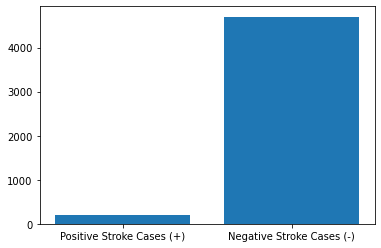

In [16]:
#Start by splitting my stroke and no stroke groups properly into two.

stroke_no = df[df['stroke'] == 0]
#saving no stroke above to the a var below called total_count_of_no_stroke
total_count_of_no_stroke = stroke_no['stroke']

stroke_yes = df[df['stroke'] == 1]
#saving no stroke above to the a var below called total_count_of_yes_stroke
total_count_of_yes_stroke = stroke_yes['stroke']

#Setting count of both strokes below by simply calling .count() of the var above
count_of_both_strokes = [total_count_of_yes_stroke.count(), total_count_of_no_stroke.count()]
#Labeling Below for Stroke and No Stroke
labels = ('Positive Stroke Cases (+)', 'Negative Stroke Cases (-)')

#Can use a bar graph below to represent the total count of both
print ("Total Number with Positive Stroke IS: \n",total_count_of_yes_stroke.count())
print ("Total Number with Negative Stroke IS: \n",total_count_of_no_stroke.count())
plt.bar(labels, count_of_both_strokes)

### After analyzing my data above, I can see the the total number of positive cases is 209 and the negative result is 4700. So currently my ratio of positive to negative is 209:4700 which would place it at appox. 1:22 chances

### Observing the information avove it is clear that in this specific dataset, every 1 in 22 people have a stroke.

### -------------------------------------------------------------------------------------------------------------------------------------------

## Now I want to create a heatmap so I can understand my data further

<AxesSubplot:>

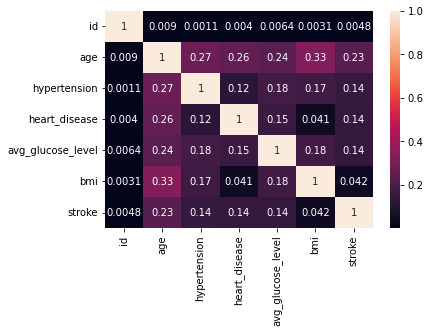

In [17]:
#Creating a quick heatmap below
sns.heatmap(data=df.corr(),annot=True)

### -------------------------------------------------------------------------------------------------------------------------------------------

## Now I want to provide a lineplot of stroke and age, before I had plotted a histogram that was a bit messy, the lineplot below will be easier to read as well as have a cleaner look to analyze

<AxesSubplot:xlabel='stroke', ylabel='age'>

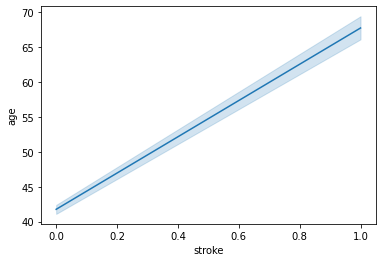

In [18]:
sns.lineplot(data=df, x="stroke", y="age")

### By analyzing the line plot above I am able to conclude that the chances of stroke becoming more likely and positive usually occur after the age of 40 years old. The age group of 50-55 is already above a 0.4 chance and by the age of 55-60 the chances are up to 0.5. I can also conclude that when a patient reaches the age of 65 and higher that their chances of stroke go up significantly increasing another whole 0.5

### -------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
#Double checking unique values real quick instead of scrolling up constantly.
df_uniques = df.nunique()
df_uniques

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### -------------------------------------------------------------------------------------------------------------------------------------------

# Random Forest Classification Machine Learning Applied

In [27]:
#Need to be able to replace my strings with actual values otherwise I cannot perform a train_test_split because
#It gives me errors such as "Male or Female cannot be strings only numerical"

df.gender.replace({'Male': 1, 'Female': 0, 'Other':2,}, inplace=True)

df.ever_married.replace({'No': 0, 'Yes': 1}, inplace=True)

df.work_type.replace({'Private': 0, 'Self-employed': 1, 'children': 2,'Govt_job':3,'Never_worked':4}, inplace=True)

df.Residence_type.replace({'Urban': 0, 'Rural': 1}, inplace=True)

df.smoking_status.replace({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3}, inplace=True)

## During the start of this project I had deleted the ID column as it was messy and served no purpose, so just going to simply fill missing data below

In [28]:
#Fill missing data
df.fillna(df.mode())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.6,2,1
2,31112,1,80.0,0,1,1,0,1,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,0,0,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,1,1,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,2,1,103.08,18.6,1,0
5106,44873,0,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,0,1,166.29,25.6,2,0


### Setting up my features from my data above, so that will be the age, bmi, avg.glucose_level, hypertension, heart_disease, and smoking_status to be able to help train and predict

In [29]:
all_features = ["age", "bmi", "avg_glucose_level", "hypertension", "heart_disease", "smoking_status" ]
X = df[all_features]
Y = df.stroke

### Now I can begin importing and start working on my train_test_split, also set the random_state to 42 below:

In [31]:
#Let's begin on my train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

### Importing and starting on StandardScaler then begin on initating the RCF

In [32]:
#Performing standard scaler below:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#Initating the RandomForestClassifier model
rcf = RandomForestClassifier()
#fit the model to the training data
rcf.fit(X_train, Y_train)
#predict to get the prediction values for the test set
y_train_pred = rcf.predict(X_train)
y_test_pred = rcf.predict(X_test)### Importing and starting on StandardScaler then begin on initating the RCF

### Importing Confusion Matric and plotting it using the rcf, X_test, Y_test

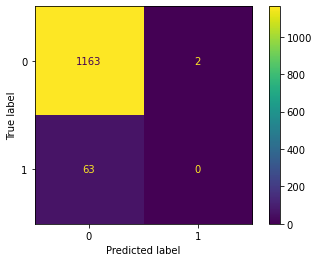

In [36]:
#Confusion Matrix Importing below
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#print the confusion matrix for the Random Forest Predictions
plot_confusion_matrix(rcf, X_test, Y_test)

### Now I want to import and produce my classification report:

In [37]:
from sklearn import metrics
#print the classification report
print(metrics.classification_report(y_test_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1226
           1       0.00      0.00      0.00         2

    accuracy                           0.95      1228
   macro avg       0.50      0.47      0.49      1228
weighted avg       1.00      0.95      0.97      1228



#### Include: Which performance metric was used, why? Which model was used, why? Were results expected or unexpected?
### To Conclude: The type of machine learning matrix used was Random Forest Classificatin (RCF). It was helpful for me because I was able to plot a confusion matrix and provide a classifcation report. The total accuracy of my model was a suprise to me at 0.95% total accuracy applied AFTER Random Forest Classification. These are good results as I was expecting a total accuracy score of less than 0.85.

### -------------------------------------------------------------------------------------------------------------------------------------------